In [143]:
import pandas as pd
tayko = pd.read_csv('datasets/Tayko.csv')
tayko.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,963.5360,0.833000,0.197000,0.044000,0.036000,0.047000,0.134000,0.019000,0.013000,0.01200,...,0.017000,0.154000,2.077000,1975.010000,2475.384000,0.544000,0.514000,0.223000,1.0,205.249000
std,584.7072,0.373162,0.397931,0.205198,0.186383,0.211745,0.340823,0.136593,0.113331,0.10894,...,0.129336,0.361129,1.598633,1118.469756,1032.463509,0.498309,0.500054,0.416467,0.0,220.739559
min,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,3.000000
25%,436.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,1027.750000,1790.750000,0.000000,0.000000,0.000000,1.0,94.750000
50%,951.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,2.000000,1995.000000,2612.500000,1.000000,1.000000,0.000000,1.0,153.000000
75%,1485.2500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,2.250000,2912.000000,3270.000000,1.000000,1.000000,0.000000,1.0,233.750000
max,1997.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.0,1500.000000


In [144]:
tayko.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending', 'Partition'],
      dtype='object')

In [145]:
# rename columns to avoid problems with space characters or leading digits

tayko = tayko.rename(columns={'1st_update_days_ago': 'first_update_days_ago', 'Web order': 'web_order', 'Gender=male': 'gender_male'})

In [146]:
tayko['Spending'].mean()

205.249

In [159]:
tayko['Spending'].groupby(tayko['web_order']).mean()

web_order
0    208.710526
1    202.347426
Name: Spending, dtype: float64

In [160]:
tayko['Spending'].groupby(tayko['web_order']).std()

web_order
0    222.477962
1    219.434655
Name: Spending, dtype: float64

In [147]:
tayko['Spending'].groupby(tayko['gender_male']).mean()

gender_male
0    210.039095
1    200.719844
Name: Spending, dtype: float64

In [156]:
tayko['Spending'].groupby(tayko['gender_male']).std()

gender_male
0    222.973246
1    218.727285
Name: Spending, dtype: float64

In [148]:
tayko['Spending'].groupby(tayko['Address_is_res']).mean()

Address_is_res
0    211.153153
1    184.677130
Name: Spending, dtype: float64

In [157]:
tayko['Spending'].groupby(tayko['Address_is_res']).std()

Address_is_res
0    239.78176
1    133.21088
Name: Spending, dtype: float64

In [149]:
tayko['Spending'].groupby(tayko['US']).mean()

US
0    212.736527
1    203.747899
Name: Spending, dtype: float64

In [158]:
tayko['Spending'].groupby(tayko['US']).std()

US
0    201.466407
1    224.487293
Name: Spending, dtype: float64

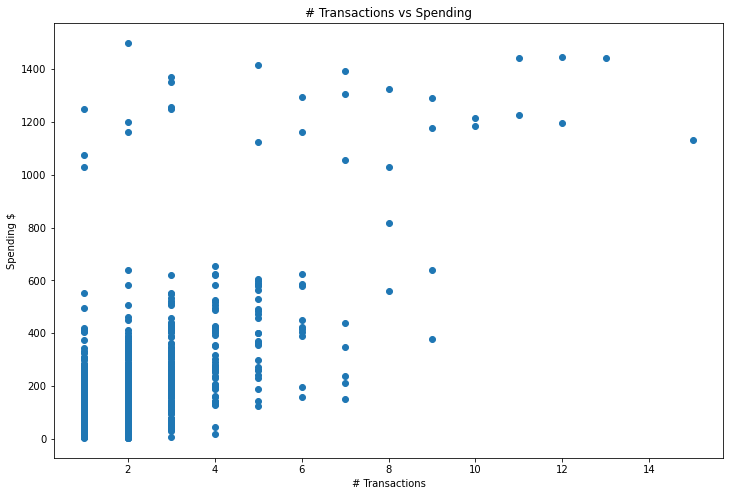

In [150]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.title('# Transactions vs Spending')
plt.scatter(tayko['Freq'], tayko['Spending'])
plt.xlabel('# Transactions')
plt.ylabel('Spending $')
plt.show()

Text(0, 0.5, 'Spending $')

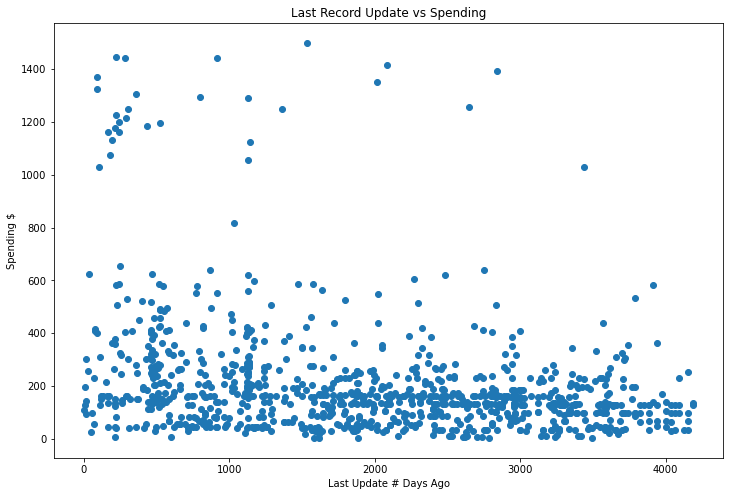

In [151]:
plt.figure(figsize=(12,8))
plt.title('Last Record Update vs Spending')
plt.scatter(tayko['last_update_days_ago'], tayko['Spending'])
plt.xlabel('Last Update # Days Ago')
plt.ylabel('Spending $')

In [152]:
# SK Learn Linear Regression model

from sklearn.linear_model import LinearRegression
predictors = ['Freq', 'last_update_days_ago', 'web_order', 'gender_male', 'Address_is_res', 'US']
outcome = 'Spending'

In [153]:
X = tayko[predictors]
y = tayko[outcome]

In [154]:
X.columns

Index(['Freq', 'last_update_days_ago', 'web_order', 'gender_male',
       'Address_is_res', 'US'],
      dtype='object')

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [162]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [163]:
tayko_lm = LinearRegression()
tayko_lm.fit(X_train, y_train)

LinearRegression()

In [164]:
tayko_lm.intercept_

211.515

In [165]:
tayko_lm.coef_

array([141.76122701, -26.90405377,   1.32779688,   1.06300062,
       -38.36382621,  -6.19707371])

In [166]:
for i in range(len(X.columns)):
    print(X.columns[i], tayko_lm.coef_[i])

Freq 141.76122700957654
last_update_days_ago -26.904053766072074
web_order 1.3277968792766734
gender_male 1.0630006223804385
Address_is_res -38.36382620936531
US -6.197073707238269


In [167]:
tayko_new = [[3, 1656, 1, 0, 1, 0]]
tayko_new = sc.transform(tayko_new)
tayko_new_pred = tayko_lm.predict(tayko_new)
print(tayko_new_pred)

[241.13487261]


In [168]:
from sklearn.metrics import r2_score, mean_squared_error

In [169]:
y_pred_train = tayko_lm.predict(X_train)
y_pred_test = tayko_lm.predict(X_test)

In [170]:
import numpy as np
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print('RMSE Train', RMSE_train)
print('RMSE Test', RMSE_test)
print('R2 Train', r2_train)
print('R2 Test', r2_test)

RMSE Train 170.51951009122024
RMSE Test 134.52840739909624
R2 Train 0.43969826334562645
R2 Test 0.483220942302652


(array([ 1.,  8., 48., 88., 42., 10.,  1.,  1.,  0.,  1.]),
 array([-458.84207687, -337.17596339, -215.5098499 ,  -93.84373641,
          27.82237708,  149.48849057,  271.15460406,  392.82071755,
         514.48683104,  636.15294453,  757.81905801]),
 <BarContainer object of 10 artists>)

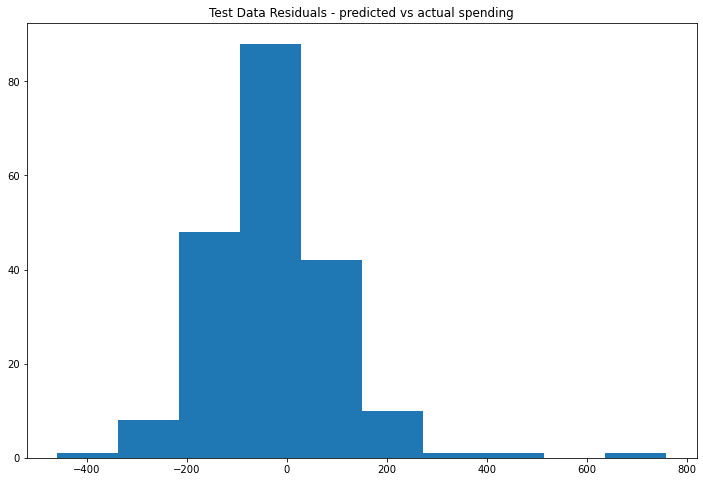

In [172]:
plt.figure(figsize=(12,8))
plt.title('Test Data Residuals - predicted vs actual spending')
plt.hist(y_test - y_pred_test)

In [120]:
from statsmodels.formula.api import ols
y = tayko['Spending']
X = tayko.drop(['sequence_number', 'Spending', 'Partition'], axis=1)

In [121]:
model = ols('Spending ~ US + source_a + source_c + source_b + source_d + source_e + source_m + source_o + source_h + source_r + source_s + source_t + source_u + source_p + source_x + source_w + Freq + last_update_days_ago + first_update_days_ago + web_order + gender_male + Address_is_res + Purchase', data=tayko).fit()

In [122]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     38.75
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          9.51e-117
Time:                        15:11:07   Log-Likelihood:                -6501.7
No. Observations:                1000   AIC:                         1.305e+04
Df Residuals:                     977   BIC:                         1.316e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                39.50

In [123]:
model_2 = ols('Spending ~ Freq + Address_is_res - 1', data=tayko).fit()
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:               Spending   R-squared (uncentered):                   0.695
Model:                            OLS   Adj. R-squared (uncentered):              0.695
Method:                 Least Squares   F-statistic:                              1139.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                   2.87e-258
Time:                        15:11:07   Log-Likelihood:                         -6533.0
No. Observations:                1000   AIC:                                  1.307e+04
Df Residuals:                     998   BIC:                                  1.308e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [124]:
model_3 = ols('Spending ~ Freq + Address_is_res', data=tayko).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     390.0
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          7.61e-126
Time:                        15:11:07   Log-Likelihood:                -6526.5
No. Observations:                1000   AIC:                         1.306e+04
Df Residuals:                     997   BIC:                         1.307e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         31.6761      8.763      3.

In [125]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=[75, 75, 75], max_iter = 10000, activation = 'relu')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.31433040263952816


In [126]:
clf = MLPRegressor(hidden_layer_sizes=[50, 50, 50], max_iter = 10000, activation = 'relu', learning_rate_init = 0.01)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.2023378378246603


In [127]:
clf = MLPRegressor(hidden_layer_sizes=[10, 10], max_iter = 10000, activation = 'relu', learning_rate_init = 0.01)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.2413321821987876
